In [2]:
import scipy
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from matplotlib import colors as mcolors

df = pd.read_csv('imdb_top_1000.csv')
df = df.drop_duplicates(subset="Series_Title", keep=False)

print(df)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2    https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3    https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4    https://m.media-amazon.com/images/M/MV5BMWU4N2...   
..                                                 ...   
995  https://m.media-amazon.com/images/M/MV5BNGEwMT...   
996  https://m.media-amazon.com/images/M/MV5BODk3Yj...   
997  https://m.media-amazon.com/images/M/MV5BM2U3Yz...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title  Released_Year Certificate  Runtime  \
0    The Shawshank Redemption           1994           A  142 min   
1               The Godfather           1972           A  175 min   
2             The Dark Knight           2008          UA  152 min   
3      The Godfather: Part 

## Network 1: Movies by Reoccuring Actors

### Network Specifications
**Node Count**: 1000 (1000 movies)<br/>
**Weighted Undirected Graph**: Where weight is equal to the amount of reoccuring actors between two movies. Edges are undirected as there will be the same amount of connected actors between each movie<br/>
**Max Weight**: 4 (Database only includes the four "star" actors of a movie)<br/>

In this network our goal to find any connections between successfull movies and their actors. We want to see if there are any types of clustering that occurs when we do this. We're hoping to see if movies in the top 1000 in IMDB tend to be those who have famous actors.<br/> <br/>
We are expecting that many of the movies that have few connections are ones that are from different movie industries (Bolleywood vs Hollywood).


In [12]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], row["Released_Year"]))
    G.add_node(row["Series_Title"], genre=row["Genre"], year=row["Released_Year"], actors=[row["Star1"], row["Star2"], row["Star3"], row["Star4"]])


titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
        if weight >= 1:
            G.add_edge(rows[i][0], rows[j][0], weight=weight)

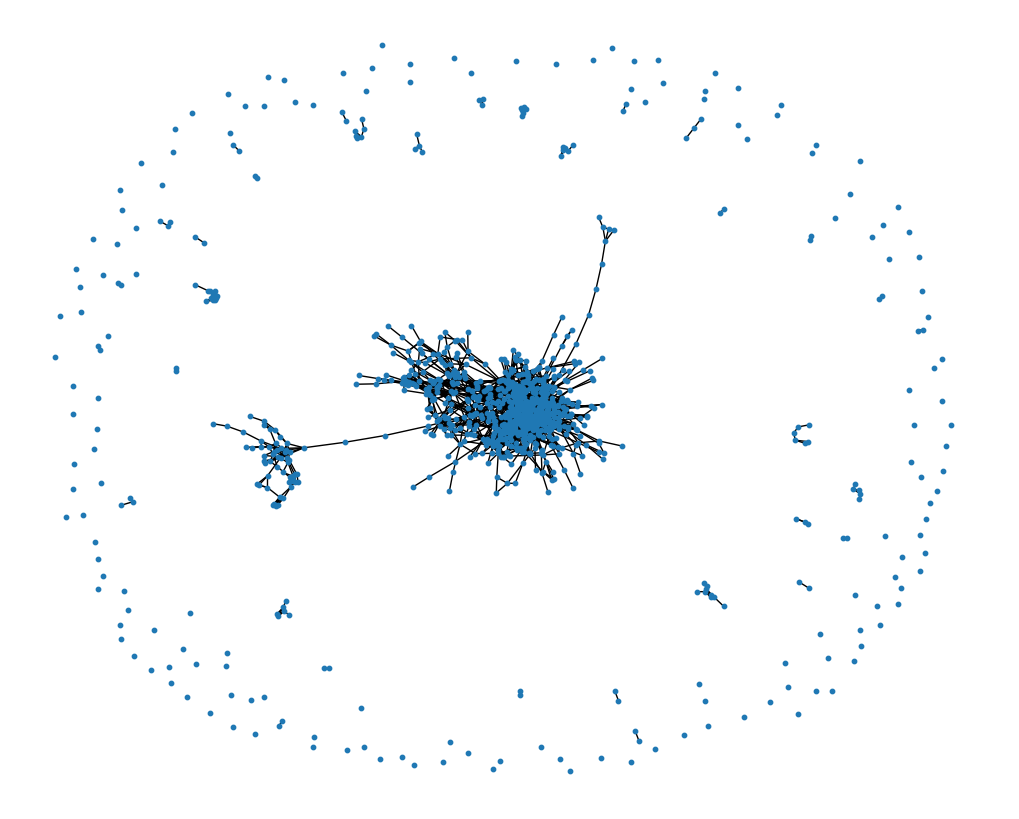

In [3]:
plt.figure(figsize=(10, 8))  
nx.draw(G, node_size=10)

Initial network. Here we can see that there is a big cluster in the middle. With out preconcieved notion we believe that these nodes in the center are likely to be movies with famous actors. Hence why there is a giant cluster in the center. <br/><br/>
Outside of the giant cluster in the center there are also smaller clusters on the edges with 4-10 nodes. Which we assume to be nodes from non-american movies. <br/><br/>
Lastly the movies at the very edges of the network are movies with 0 connections. Which means that they have actors with smaller careers.

Number of edges 2798


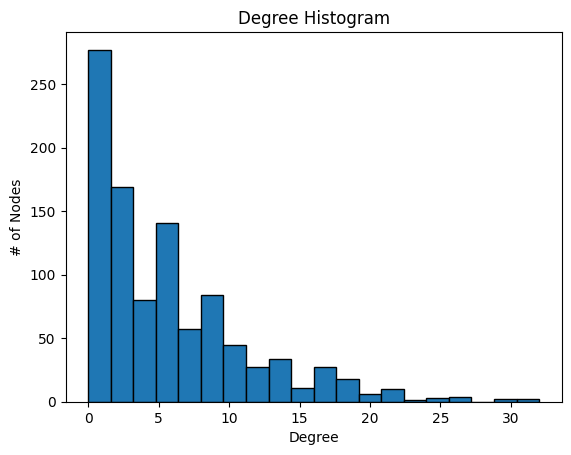

In [4]:
print("Number of edges", G.number_of_edges())

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
plt.hist(degree_sequence, bins=20, edgecolor="k")
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")
plt.show()

In [5]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Top 10 movies with the most connections")
for degree, movie in degree_sequence[0:10]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    print( '{:<50s} {:<15s} {:<10s}'.format(string_one, string_two, string_three) )

print("")
print("Bottom 10 movies with the most connections")

for degree, movie in degree_sequence[len(degree_sequence)-10:]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    print( '{:<50s} {:<15s} {:<10s}'.format(string_one, string_two, string_three) )

Top 10 movies with the most connections
Movie: The Godfather: Part II                      Degree: 32      	Year: 1974
Movie: Sleepers                                    Degree: 32      	Year: 1996
Movie: Heat                                        Degree: 30      	Year: 1995
Movie: The Irishman                                Degree: 29      	Year: 2019
Movie: The Prestige                                Degree: 27      	Year: 2006
Movie: The Departed                                Degree: 27      	Year: 2006
Movie: The Big Short                               Degree: 27      	Year: 2015
Movie: Catch Me If You Can                         Degree: 27      	Year: 2002
Movie: Ocean's Eleven                              Degree: 25      	Year: 2001
Movie: Saving Private Ryan                         Degree: 24      	Year: 1998

Bottom 10 movies with the most connections
Movie: Apocalypto                                  Degree: 0       	Year: 2006
Movie: Amarcord                                

['Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton', 'Robert De Niro', 'Kevin Bacon', 'Brad Pitt', 'Jason Patric', 'Al Pacino', 'Robert De Niro', 'Val Kilmer', 'Jon Voight', 'Robert De Niro', 'Al Pacino', 'Joe Pesci', 'Harvey Keitel', 'Christian Bale', 'Hugh Jackman', 'Scarlett Johansson', 'Michael Caine', 'Leonardo DiCaprio', 'Matt Damon', 'Jack Nicholson', 'Mark Wahlberg', 'Christian Bale', 'Steve Carell', 'Ryan Gosling', 'Brad Pitt', 'Leonardo DiCaprio', 'Tom Hanks', 'Christopher Walken', 'Martin Sheen', 'George Clooney', 'Brad Pitt', 'Julia Roberts', 'Matt Damon', 'Tom Hanks', 'Matt Damon', 'Tom Sizemore', 'Edward Burns']


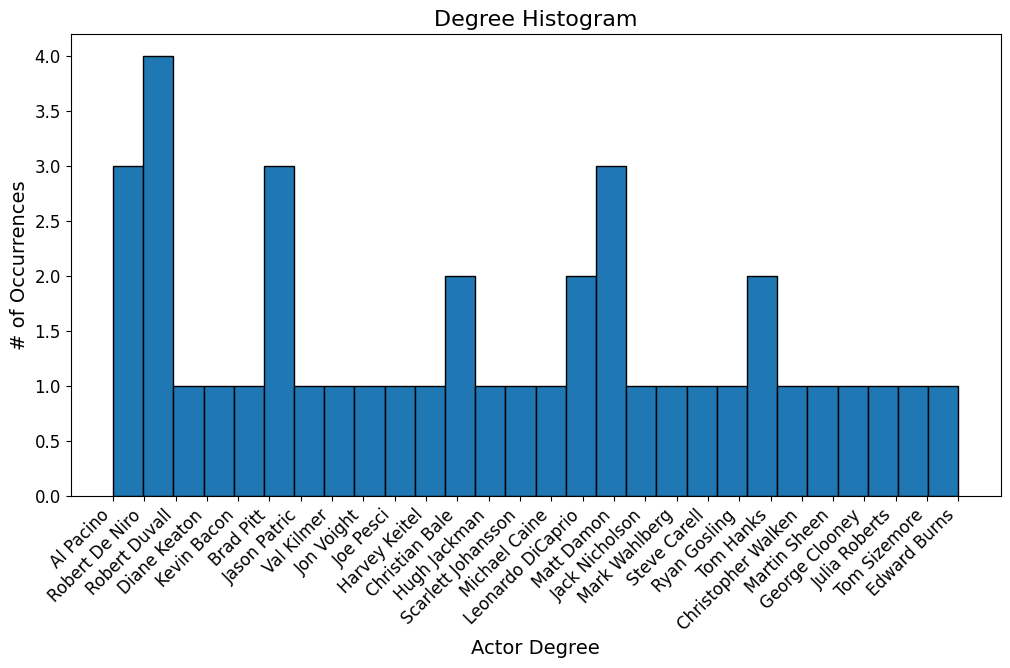

In [31]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)[0:10]
degree_actors = []
#.split(", ")
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)[0:10]
degree_actors = []

for degree, movie in degree_sequence:
    actors = G.nodes[movie]['actors']
    for actor in actors:
        degree_actors.append(actor)

# Print the degree_actors list to check its contents
print(degree_actors)

plt.figure(figsize=(12, 6))
plt.hist(degree_actors, bins=28, edgecolor="k")
plt.title("Degree Histogram", fontsize=16)
plt.xlabel("Actor Degree", fontsize=14)
plt.ylabel("# of Occurrences", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [27]:
actors = ['Al Pacino', 'Robert De Niro', 'Robert Duvall', 'Diane Keaton', 'Robert De Niro', 
          'Kevin Bacon', 'Brad Pitt', 'Jason Patric', 'Al Pacino', 'Robert De Niro', 
          'Val Kilmer', 'Jon Voight', 'Robert De Niro', 'Al Pacino', 'Joe Pesci', 'Harvey Keitel', 
          'Christian Bale', 'Hugh Jackman', 'Scarlett Johansson', 'Michael Caine', 'Leonardo DiCaprio', 
          'Matt Damon', 'Jack Nicholson', 'Mark Wahlberg', 'Christian Bale', 'Steve Carell', 
          'Ryan Gosling', 'Brad Pitt', 'Leonardo DiCaprio', 'Tom Hanks', 'Christopher Walken', 
          'Martin Sheen', 'George Clooney', 'Brad Pitt', 'Julia Roberts', 'Matt Damon', 
          'Tom Hanks', 'Matt Damon', 'Tom Sizemore', 'Edward Burns']

unique_actors = set(actors)  # This removes duplicates
unique_actor_count = len(unique_actors)  # Count the unique names
print(unique_actor_count)


28


Looking at the movies with the highest degrees we can see a few trends. 
1) Many of the movies are created between 1970-2015
2) Each movie is a live action movie
3) Movies primarly compose of American / english speaking actors (Hollywood)

Looking at the movies with the lowest degrees we can see the opposite:
1) The movies release years have a wider range. 
2) We see more animated movies
3) We see movies that are created outside of the of Hollywood (Akira, Auf der anderen Seite, Au revoir les enfants

This verifies some of our initial assumptions. Many of the movies with the most conenctions comprise of actors that do Hollywood 
films. Another thing that the degree histogram helps us see is that many of the movies are of a certain range. This makes sense
since IMDB first launched in 1990. Which means that many older movies are less likely to have had an active amount of members
rate them. Additionally movies popularity began to sky rocket some time after the 1950s so many of the older actors from 
those times are less likely to appear in numerous amounts of popular movies. One last observation is that some movies for non
english audiences have 0 degrees. This makes sense considering that IMDB is an primarly engish based website so it is less likely
for movies outside of this demographic to be rated highly.

### Network Recolour (Colour based on movie release date)

#### Darker colours = Newer Movies
#### Movies colours = Older Movies

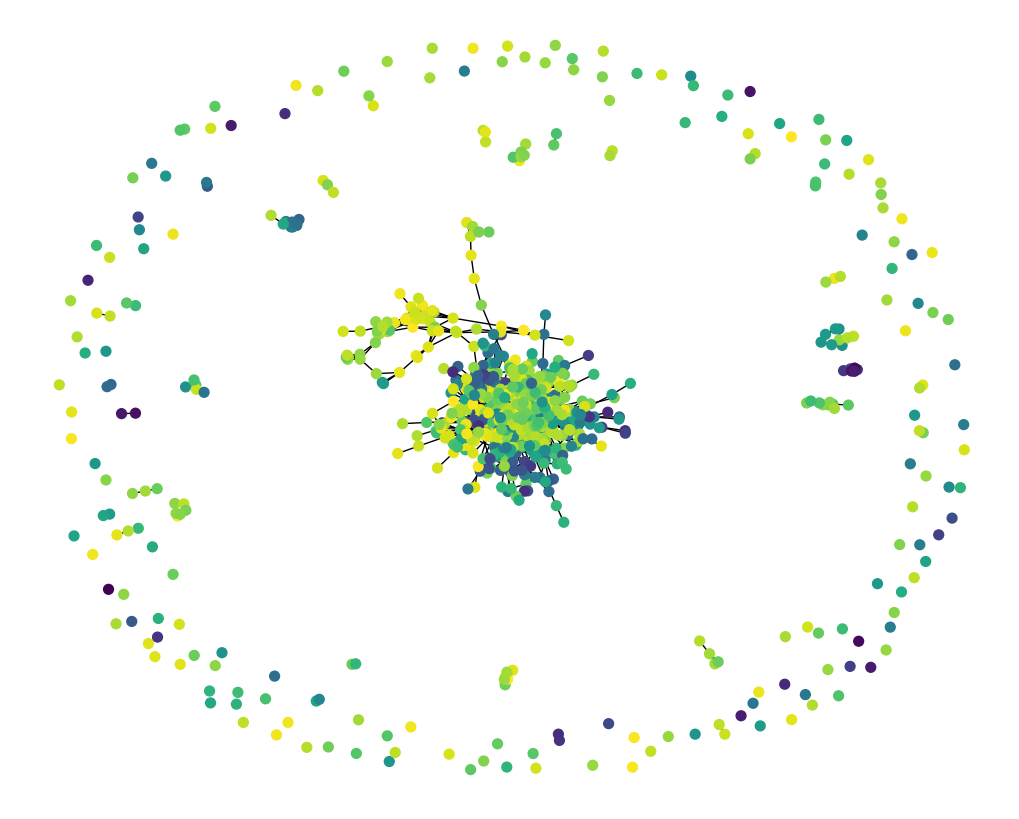

In [6]:
# Darker colours = Newer Movies
# Lighter colours = Older Movies

release_years = []
for row in rows:
    release_years.append(row[2])

year_max = max(release_years)
year_min = min(release_years)

norm = plt.Normalize(year_min, year_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(year)) for year in release_years]

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors, node_size=50)

### Network Recolour (Colour based on community)

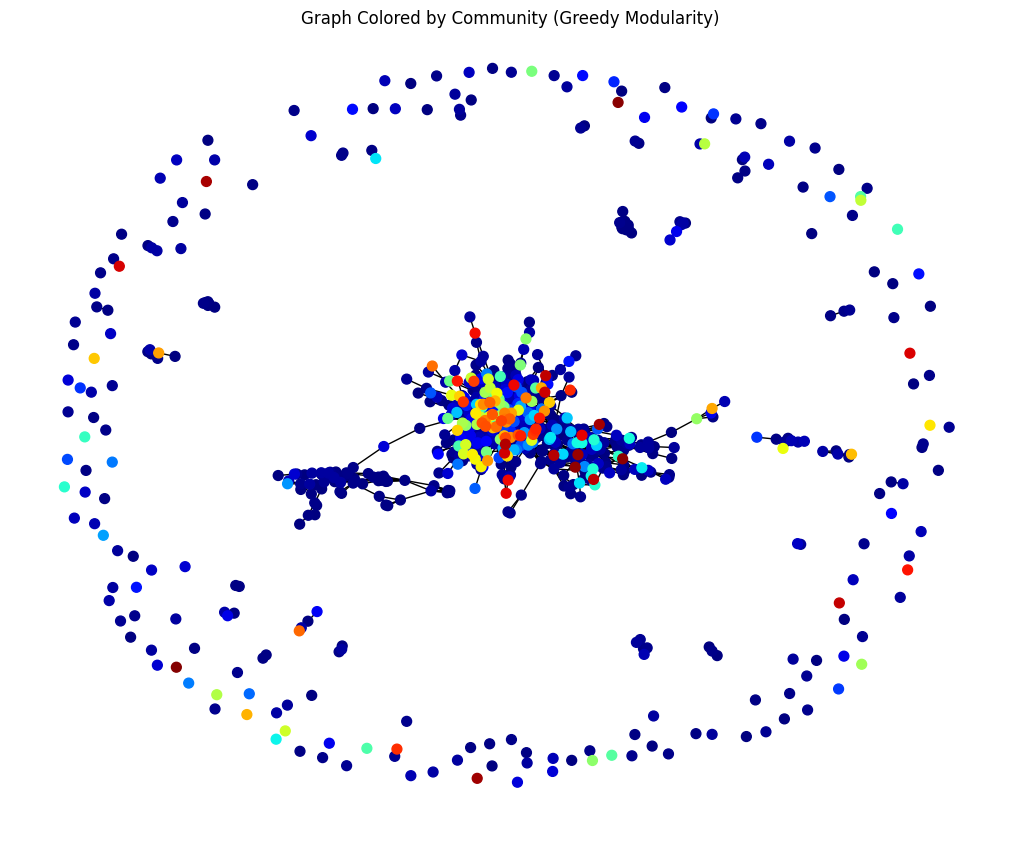

In [7]:
communities = list(nx.community.greedy_modularity_communities(G))

colors = []
for i , community in enumerate(communities):
    for node in community:
        colors.append(i)


plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)

node_colors = [plt.cm.jet(c / len(communities)) for c in colors]

nx.draw(G, pos, node_color=node_colors, node_size=50, font_size=10, font_weight='bold')
plt.title("Graph Colored by Community (Greedy Modularity)")
plt.show()

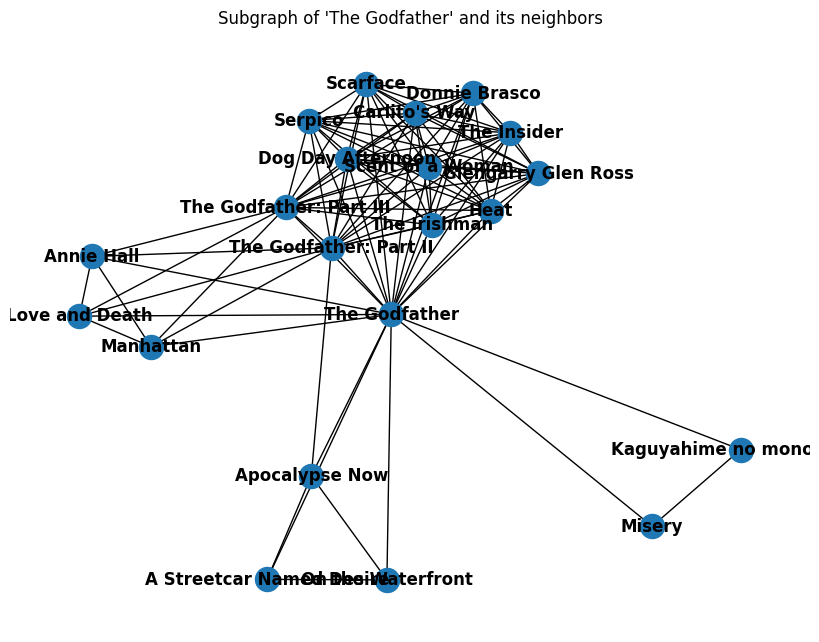

In [8]:
specific_node = 'The Godfather'

neighbors = list(G.neighbors(specific_node))

subgraph_nodes = [specific_node] + neighbors
subgraph = G.subgraph(subgraph_nodes)

plt.figure(figsize=(8, 6))
nx.draw(subgraph, with_labels=True, font_weight='bold')
plt.title(f"Subgraph of '{specific_node}' and its neighbors")
plt.show()


In [9]:
ccs = nx.closeness_centrality(G)
closeness_centarlity = sorted(ccs.items(), key=lambda movie: movie[1], reverse=True)

for movie in closeness_centarlity:
    print(movie)

('Sleepers', 0.19210101233934365)
('The Big Short', 0.19092162728706163)
('Inside Man', 0.18989295472624773)
('The Insider', 0.18975663530433368)
('The Prestige', 0.188807852127812)
('The Man Who Would Be King', 0.18726956640378098)
('A Beautiful Mind', 0.18674036946586847)
('The Departed', 0.1862797695411817)
('Children of Men', 0.1856256973166691)
('The Dark Knight Rises', 0.18556054263175628)
('The Godfather: Part II', 0.1853003806371797)
('Batman Begins', 0.1849115026085602)
("Ocean's Eleven", 0.1847822390625214)
('Good Will Hunting', 0.1842669870888371)
('Heat', 0.1840104371590232)
('American Gangster', 0.18381849303124953)
('The Bourne Identity', 0.18356318956870613)
('Ford v Ferrari', 0.18349947447340287)
('3:10 to Yuma', 0.18343580359398806)
('Catch Me If You Can', 0.18292802282279366)
('The Girl with the Dragon Tattoo', 0.18280151658294386)
('The Fighter', 0.18280151658294386)
('The Untouchables', 0.18254902830037073)
('The Irishman', 0.18223439708992542)
('Shutter Island', 0.

In [10]:
ccs = nx.betweenness_centrality(G)
closeness_centarlity = sorted(ccs.items(), key=lambda movie: movie[1], reverse=True)

for movie in closeness_centarlity:
    print(movie)

('Lion', 0.08268419371283936)
('Slumdog Millionaire', 0.07680269724837162)
('Barfi!', 0.07556806967085997)
('Rockstar', 0.07432941394464518)
('Airlift', 0.07319562915175051)
('The Girl with the Dragon Tattoo', 0.04232773441358857)
('Her', 0.0339173028333022)
('JFK', 0.022593788117318703)
('The Lunchbox', 0.021842277558522433)
('Charade', 0.02125531471660004)
('Inside Man', 0.020704106278081405)
('The Insider', 0.019077248820736466)
('The Prestige', 0.01862027554948532)
('Magnolia', 0.018493997268662365)
('Dogville', 0.017348387001517918)
('Good Will Hunting', 0.017135807603049964)
('The Dark Knight Rises', 0.01598775782106977)
('Baby', 0.015768951368672218)
('The Lion in Winter', 0.01566015138787846)
('Sleepers', 0.01537315780978949)
('Hera Pheri', 0.015362958082683524)
('The Philadelphia Story', 0.015317501303925578)
('Sabrina', 0.015249213226271062)
('Unforgiven', 0.015240145840709885)
('Donnie Brasco', 0.01519407796282686)
('The Big Short', 0.014714241596510507)
('Catch Me If You Ca

{'genre': 'Action, Adventure, Fantasy', 'year': 1977}


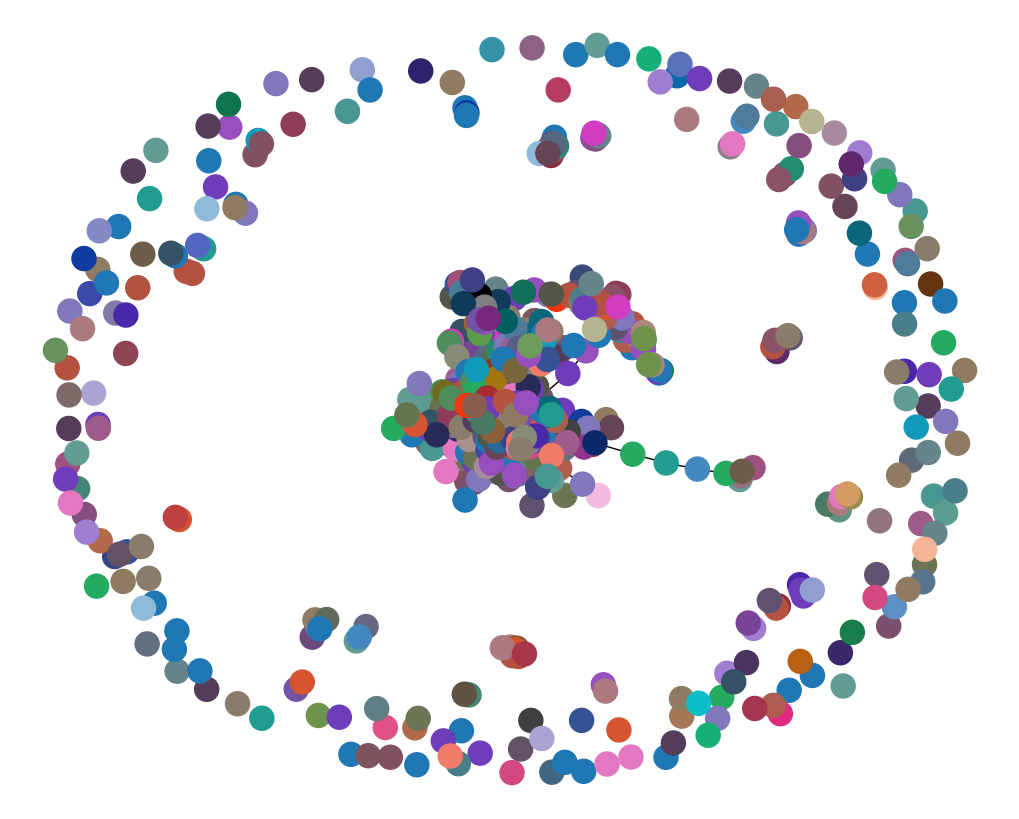

In [11]:
genre_colors = {
    "Drama": 'tab:blue',
    "Crime": 'tab:orange',
    "Action": 'r',
    "Adventure": 'tab:green',
    "Biography": 'tab:red',
    "History": 'tab:brown',
    "Sci-Fi": 'c',
    "Romance": 'm',
    "Western": 'y',
    "Fantasy": 'tab:purple',
    "Comedy": 'tab:pink',
    "Thriller": 'tab:gray',
    "Animation": 'tab:cyan',
    "Family": 'tab:green',
    "War": 'darkred',
    "Mystery": 'darkblue',
    "Music": 'w',
    "Horror": 'k',
    "Musical": 'orange',
    "Film-Noir": 'tab:gray',
    "Sport": 'darkgreen'
}

def blend_colors(genres):
    # Convert genre colors to RGBA (including transparency)
    genres = genres.split(", ")
    colors = [mcolors.to_rgba(genre_colors[genre]) for genre in genres]
    # Average the colors (blend them)
    avg_color = np.mean(colors, axis=0)
    return avg_color

print(G.nodes["Star Wars"])
node_colors = [blend_colors(G.nodes[node]['genre']) for node in G.nodes]

plt.figure(figsize=(10, 8))
nx.draw(G, node_color=node_colors)

# Display the plot
plt.show()


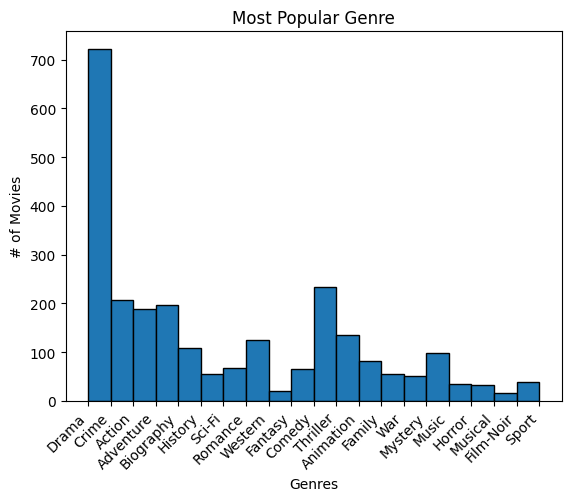

In [12]:
movie_by_genre = []

for index, row in df.iterrows():
    genres = row["Genre"].split(", ")
    title = row["Series_Title"]
    for genre in genres:
        movie_by_genre.append(genre)

plt.hist(movie_by_genre, bins=20, edgecolor="k")
plt.title("Most Popular Genre")
plt.xlabel("Genres")
plt.ylabel("# of Movies")
plt.xticks(rotation=45, ha='right')
plt.show()

# Network 2: Ratings

In [13]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    rows.append((row["Series_Title"], [row["Star1"], row["Star2"], row["Star3"], row["Star4"]], row["Released_Year"], row["IMDB_Rating"], row["Meta_score"]))
    G.add_node(row["Series_Title"], genre=row["Genre"], year=row["Released_Year"], IMDB=row["IMDB_Rating"], meta=row["Meta_score"])


titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
        if weight >= 1:
            G.add_edge(rows[i][0], rows[j][0], weight=weight)

In [14]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Movies top 25 movies with the most connections")
for degree, movie in degree_sequence[0:25]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s}'.format(string_one, string_two, string_three, string_four, string_five) )

print("")

for degree, movie in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s}'.format(string_one, string_two, string_three, string_four, string_five) )

Movies top 25 movies with the most connections
Movie: The Godfather: Part II                      Degree: 32      	Year: 1974 	IMDB: 9.0 	Meta: 90.0
Movie: Sleepers                                    Degree: 32      	Year: 1996 	IMDB: 7.6 	Meta: 49.0
Movie: Heat                                        Degree: 30      	Year: 1995 	IMDB: 8.2 	Meta: 76.0
Movie: The Irishman                                Degree: 29      	Year: 2019 	IMDB: 7.9 	Meta: 94.0
Movie: The Prestige                                Degree: 27      	Year: 2006 	IMDB: 8.5 	Meta: 66.0
Movie: The Departed                                Degree: 27      	Year: 2006 	IMDB: 8.5 	Meta: 85.0
Movie: The Big Short                               Degree: 27      	Year: 2015 	IMDB: 7.8 	Meta: 81.0
Movie: Catch Me If You Can                         Degree: 27      	Year: 2002 	IMDB: 8.1 	Meta: 75.0
Movie: Ocean's Eleven                              Degree: 25      	Year: 2001 	IMDB: 7.7 	Meta: 74.0
Movie: Saving Private Ryan         

Max IMDB: 9.3
Min IMDB: 7.6


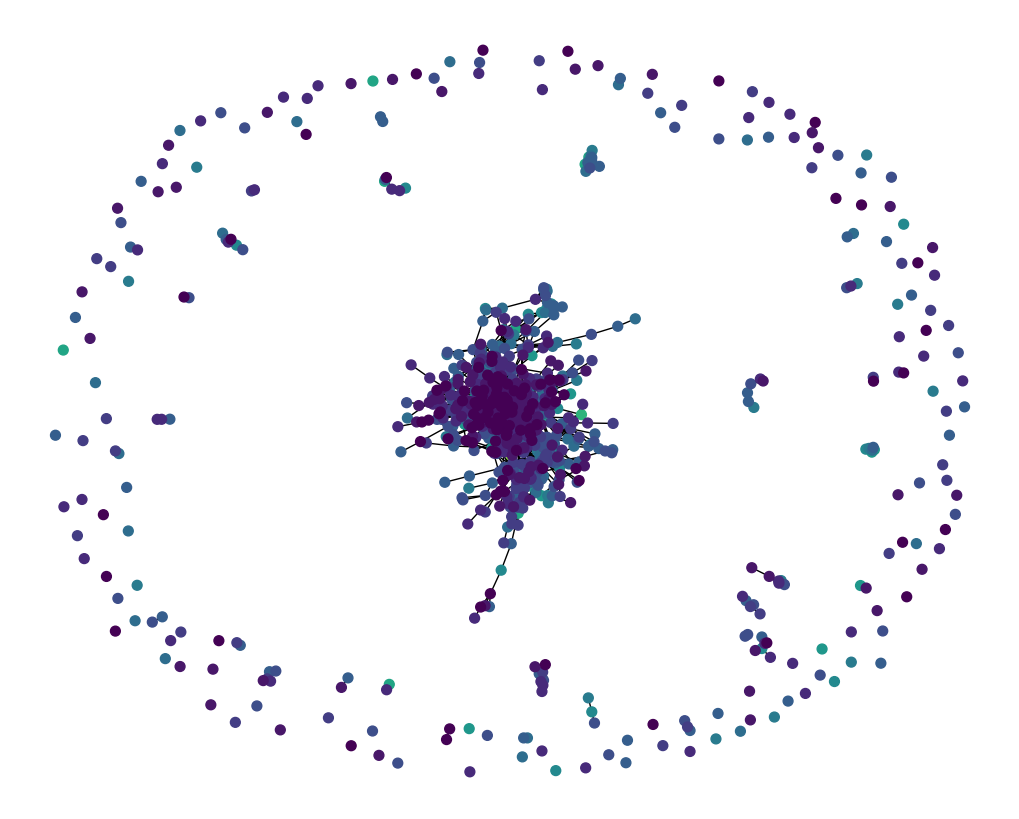

In [15]:
# Darker colours = Lower IMDB
# Lighter colours = Higher IMDB

imdb_scores = []
for row in rows:
    imdb_scores.append(row[3])

imdb_max = max(imdb_scores)
imdb_min = min(imdb_scores)

print("Max IMDB:", imdb_max)
print("Min IMDB:", imdb_min)

norm = plt.Normalize(imdb_min, imdb_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(score)) for score in imdb_scores]

plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors, node_size=50)

# Network 3: Director

In [16]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    rows.append((row["Series_Title"], row["Director"], row["Released_Year"], row["IMDB_Rating"], row["Meta_score"]))
    G.add_node(row["Series_Title"], director=row["Director"], year=row["Released_Year"], IMDB=row["IMDB_Rating"], meta=row["Meta_score"])


titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
for i in range(len(titles)):
    for j in range(i+1, len(titles)):
        if rows[i][1] == rows[j][1]:
            G.add_edge(rows[i][0], rows[j][0])

In [17]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Movies top 25 movies with the most connections")
for degree, movie in degree_sequence[0:25]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    string_six = "\Director: " + str(G.nodes[movie]['director'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s} {:<50s}'.format(string_one, string_two, string_three, string_four, string_five, string_six) )

print("")

for degree, movie in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Movie: " + movie
    string_two = "Degree: " + str(degree)
    string_three = "\tYear: " + str(G.nodes[movie]['year'])
    string_four = "\tIMDB: " + str(G.nodes[movie]['IMDB'])
    string_five = "\tMeta: " + str(G.nodes[movie]['meta'])
    string_six = "\Director: " + str(G.nodes[movie]['director'])
    print( '{:<50s} {:<15s} {:<10s} {:<10s} {:<10s} {:<50s}'.format(string_one, string_two, string_three, string_four, string_five, string_six) )

Movies top 25 movies with the most connections
Movie: Vertigo                                     Degree: 13      	Year: 1958 	IMDB: 8.3 	Meta: 100.0 \Director: Alfred Hitchcock                       
Movie: The Lady Vanishes                           Degree: 13      	Year: 1938 	IMDB: 7.8 	Meta: 98.0 \Director: Alfred Hitchcock                       
Movie: The Birds                                   Degree: 13      	Year: 1963 	IMDB: 7.7 	Meta: 90.0 \Director: Alfred Hitchcock                       
Movie: The 39 Steps                                Degree: 13      	Year: 1935 	IMDB: 7.6 	Meta: 93.0 \Director: Alfred Hitchcock                       
Movie: Strangers on a Train                        Degree: 13      	Year: 1951 	IMDB: 7.9 	Meta: 88.0 \Director: Alfred Hitchcock                       
Movie: Shadow of a Doubt                           Degree: 13      	Year: 1943 	IMDB: 7.8 	Meta: 94.0 \Director: Alfred Hitchcock                       
Movie: Rope                       

Max IMDB: 9.3
Min IMDB: 7.6


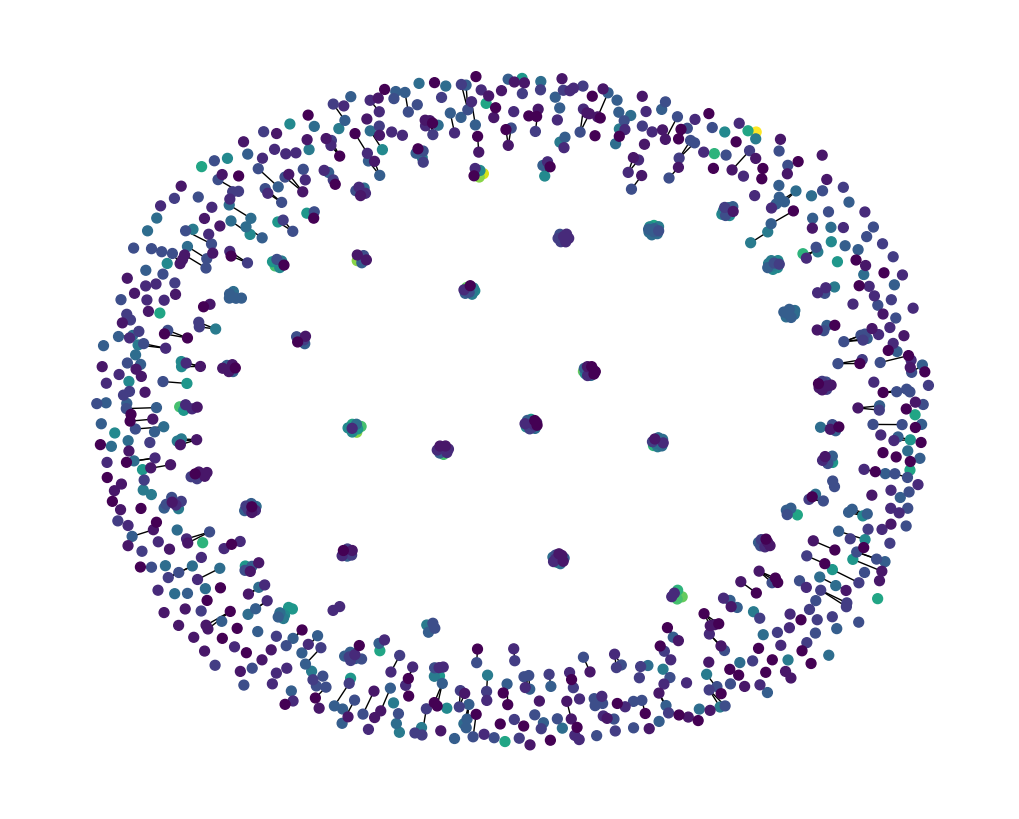

In [18]:
# Darker colours = Lower IMDB
# Lighter colours = Higher IMDB

imdb_scores = []
for row in rows:
    imdb_scores.append(row[3])

imdb_max = max(imdb_scores)
imdb_min = min(imdb_scores)

print("Max IMDB:", imdb_max)
print("Min IMDB:", imdb_min)

norm = plt.Normalize(imdb_min, imdb_max)
cmap = cm.get_cmap('viridis')

node_colors = [cmap(norm(score)) for score in imdb_scores]

pos = nx.spring_layout(G, k=0.06)
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_color=node_colors, node_size=50, pos=pos)


Average IMDB score difference between connected nodes: 0.30008517887564035
Average IMDB score difference between all nodes: 0.2996078415619927


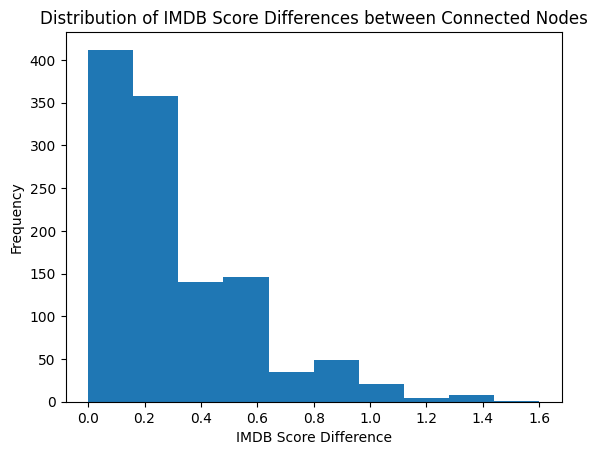

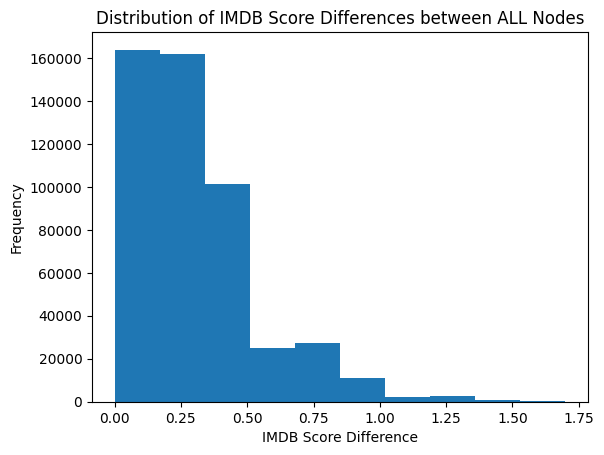

In [19]:
# Code below created by AI (with human edits)

# Create a dictionary to map node identifiers to indices
node_to_index = {node: index for index, node in enumerate(G.nodes())}

# Calculate IMDB score differences for connected edges
score_differences = []
for edge in G.edges():
    node1, node2 = edge
    index1 = node_to_index[node1] 
    index2 = node_to_index[node2]
    score_diff = abs(imdb_scores[index1] - imdb_scores[index2])
    score_differences.append(score_diff)


# Calculate IMDB score differences for all pairs of nodes
score_differences_all = []
for i in range(len(imdb_scores)):
    for j in range(i + 1, len(imdb_scores)):  # Avoid redundant comparisons
        score_diff = abs(imdb_scores[i] - imdb_scores[j])
        score_differences_all.append(score_diff)

# Analyze the distribution of score differences
avg_diff = sum(score_differences) / len(score_differences)
avg_diff_all = sum(score_differences_all) / len(score_differences_all)
print("Average IMDB score difference between connected nodes:", avg_diff)
print("Average IMDB score difference between all nodes:", avg_diff_all)

# (Optional) Create a histogram to visualize the distribution
plt.hist(score_differences, bins=10)
plt.xlabel("IMDB Score Difference")
plt.ylabel("Frequency")
plt.title("Distribution of IMDB Score Differences between Connected Nodes")
plt.show()

# (Optional) Create a histogram to visualize the distribution
plt.hist(score_differences_all, bins=10)
plt.xlabel("IMDB Score Difference")
plt.ylabel("Frequency")
plt.title("Distribution of IMDB Score Differences between ALL Nodes")
plt.show()

The director of the movie did not generally cause a more consisent IMDB score. The average difference in IMDB scores is actually lower when comparing each movie to every other movie than only comparing two movies if they had the same director.

# Actor Network / Kevin Bacon Number

In [20]:
rows = []
G = nx.Graph()

# Getting eaching movies name, stars (in one array) and genre
for index, row in df.iterrows():
    if not G.has_node(row["Star1"]):
        G.add_node(row["Star1"])
    if not G.has_node(row["Star2"]):
        G.add_node(row["Star2"])
    if not G.has_node(row["Star3"]):
        G.add_node(row["Star3"])
    if not G.has_node(row["Star4"]):
        G.add_node(row["Star4"])
        
    if G.has_edge(row["Star1"], row["Star2"]):
        G[row["Star1"]][row["Star2"]]['weight'] += 1
    else:
        G.add_edge(row["Star1"], row["Star2"], weight=1)
        
    if G.has_edge(row["Star1"], row["Star3"]):
        G[row["Star1"]][row["Star3"]]['weight'] += 1
    else:
        G.add_edge(row["Star1"], row["Star3"], weight=1) 
        
    if G.has_edge(row["Star1"], row["Star4"]):
        G[row["Star1"]][row["Star4"]]['weight'] += 1
    else:
        G.add_edge(row["Star1"], row["Star4"], weight=1) 
        
    if G.has_edge(row["Star2"], row["Star3"]):
        G[row["Star2"]][row["Star3"]]['weight'] += 1
    else:
        G.add_edge(row["Star2"], row["Star3"], weight=1) 
        
    if G.has_edge(row["Star2"], row["Star4"]):
        G[row["Star2"]][row["Star4"]]['weight'] += 1
    else:
        G.add_edge(row["Star2"], row["Star4"], weight=1) 
        
    if G.has_edge(row["Star3"], row["Star4"]):
        G[row["Star3"]][row["Star4"]]['weight'] += 1
    else:
        G.add_edge(row["Star3"], row["Star4"], weight=1)
    
      
#titles = [movie[0] for movie in rows]   

# Create edges between movies with the same actors. Weight of the edge is equal to the number of shared actors between the movies
#for i in range(len(titles)):
#    for j in range(i+1, len(titles)):
#        weight = len(set(rows[i][1]).intersection(set(rows[j][1])))
#        if weight >= 1:
#            G.add_edge(rows[i][0], rows[j][0], weight=weight)

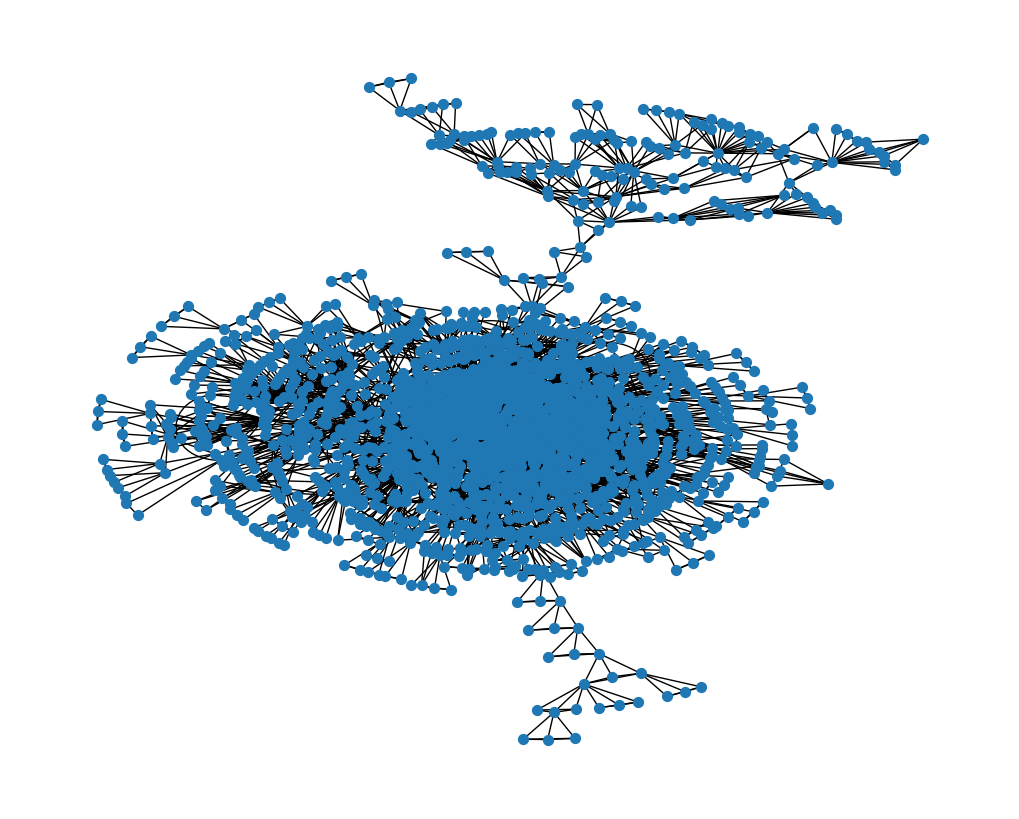

In [21]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the figure
nx.draw(G, node_size=50, pos=pos)

In [22]:
degree_sequence = sorted(((d, n) for n, d in G.degree()), reverse=True)
print("Actors top/bottom 25 most connections to other actors")
for degree, actor in degree_sequence[0:25]:
    string_one = "Actor: " + actor
    string_two = "Degree: " + str(degree)
    print( '{:<50s} {:<15s}'.format(string_one, string_two) )

print("")

for degree, actor in degree_sequence[len(degree_sequence)-24:]:
    string_one = "Actor: " + actor
    string_two = "Degree: " + str(degree)
    print( '{:<50s} {:<15s}'.format(string_one, string_two) )

Actors top/bottom 25 most connections to other actors
Actor: Robert De Niro                              Degree: 45     
Actor: Tom Hanks                                   Degree: 38     
Actor: Brad Pitt                                   Degree: 36     
Actor: Al Pacino                                   Degree: 35     
Actor: Clint Eastwood                              Degree: 33     
Actor: Leonardo DiCaprio                           Degree: 32     
Actor: Matt Damon                                  Degree: 31     
Actor: Christian Bale                              Degree: 31     
Actor: James Stewart                               Degree: 30     
Actor: Johnny Depp                                 Degree: 27     
Actor: Denzel Washington                           Degree: 27     
Actor: Michael Caine                               Degree: 25     
Actor: Humphrey Bogart                             Degree: 25     
Actor: Ethan Hawke                                 Degree: 25     
Actor: S

### Actors that frequently star with each other (highest weighted edges)

In [23]:
# AI Code
def print_top_10_edges(graph):
  """
  Prints the top 10 edges with the highest weight in a graph.

  Args:
    graph: The networkx graph.
  """
  sorted_edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
  for source, target, data in sorted_edges[:10]:
    print(f"Source: {source}, Target: {target}, Weight: {data['weight']}")

In [24]:
print_top_10_edges(G)

Source: Daniel Radcliffe, Target: Rupert Grint, Weight: 6
Source: Daniel Radcliffe, Target: Emma Watson, Weight: 5
Source: Emma Watson, Target: Rupert Grint, Weight: 5
Source: Robert De Niro, Target: Joe Pesci, Weight: 4
Source: Tom Hanks, Target: Tim Allen, Weight: 4
Source: Al Pacino, Target: Diane Keaton, Weight: 3
Source: Al Pacino, Target: Robert De Niro, Weight: 3
Source: Diane Keaton, Target: Woody Allen, Weight: 3
Source: Christian Bale, Target: Michael Caine, Weight: 3
Source: Elijah Wood, Target: Ian McKellen, Weight: 3


In [25]:
G.degree('Kevin Bacon')

18

In [60]:
def graphInfo(graph):
    print("# of nodes:", graph.number_of_nodes())
    print("# of edges:", graph.number_of_edges())
    print("# of connected components:", nx.number_connected_components(graph))
    print("Transitivity:", nx.transitivity(graph))
    print("Density (max 1):", nx.density(graph)) # https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
    closeness_centrality = nx.closeness_centrality(graph)
    max_closeness = max(closeness_centrality, key=closeness_centrality.get)
    print("Node with the highest closeness centrality:", max_closeness,"with a value of:", closeness_centrality[max_closeness])
    btwn_cent = nx.betweenness_centrality(graph)
    max_btwn = max(btwn_cent, key=btwn_cent.get)
    print("Node with the highest betweness centrality:", max_btwn,"with a value of:", btwn_cent[max_btwn])
    # Get the largest connected component
    largest_cc = max(nx.connected_components(graph), key=len)
    # Create a subgraph of the largest connected component
    largest_cc_subgraph = graph.subgraph(largest_cc)
    print("")
    print("# of nodes (largest connected component):",largest_cc_subgraph.number_of_nodes())
    print("# of edges (largest cc):",largest_cc_subgraph.number_of_edges())
    print("Graph Diameter (largest cc):", nx.diameter(largest_cc_subgraph))

In [61]:
graphInfo(G)

# of nodes: 2702
# of edges: 5825
# of connected components: 192
Transitivity: 0.3463137232261417
Density (max 1): 0.0015963054503760018
Node with the highest closeness centrality: Robert De Niro with a value of: 0.14827372922211876
Node with the highest betweness centrality: Dev Patel with a value of: 0.06575095643588795

# of nodes (largest connected component): 1721
# of edges (largest cc): 4224
Graph Diameter (largest cc): 22


In [28]:
def path_lengths_from_node(graph, source_node):
  """
  Calculates the shortest, average, and largest shortest path lengths 
  from a given source node to all other nodes in a network.
  Also identifies the destination nodes for the shortest and largest paths.

  Args:
    graph: A NetworkX graph.
    source_node: The node from which to calculate path lengths.

  Returns:
    A tuple containing:
      - shortest_path_length: The length of the shortest path.
      - shortest_path_dest: The destination node of the shortest path.
      - average_path_length: The average shortest path length.
      - largest_path_length: The length of the longest shortest path.
      - largest_path_dest: The destination node of the longest shortest path. 
  """

  shortest_paths = nx.shortest_path_length(graph, source=source_node)
  
  # Initialize variables to keep track of shortest and largest paths
  shortest_path_length = float('inf')
  shortest_path_dest = None
  largest_path_length = 0
  largest_path_dest = None

  path_lengths = []
  for dest, length in shortest_paths.items():
      path_lengths.append(length)
      if length < shortest_path_length:
          shortest_path_length = length
          shortest_path_dest = dest
      if length > largest_path_length:
          largest_path_length = length
          largest_path_dest = dest

  average_path_length = sum(path_lengths) / len(path_lengths)

  return (shortest_path_length, shortest_path_dest, 
          average_path_length, 
          largest_path_length, largest_path_dest)

In [29]:
source_node = "Kevin Bacon"

shortest, shortest_dest, avg, largest, largest_dest = path_lengths_from_node(G, source_node)

print(f"Shortest path length from node {source_node}: {shortest} to node {shortest_dest}")
print(f"Average shortest path length from node {source_node}: {avg}")
print(f"Largest shortest path length from node {source_node}: {largest} to node {largest_dest}")

Shortest path length from node Kevin Bacon: 0 to node Kevin Bacon
Average shortest path length from node Kevin Bacon: 4.607205113306217
Largest shortest path length from node Kevin Bacon: 13 to node Jaya Bachchan


In [30]:
from collections import Counter

def path_length_histogram(graph, source_node):
    """
    Calculates the shortest path lengths from a source node to all other nodes,
    generates a histogram, and prints the frequency of each path length.

    Args:
      graph: A NetworkX graph.
      source_node: The node from which to calculate path lengths.
    """

    shortest_paths = nx.shortest_path_length(graph, source=source_node)
    path_lengths = list(shortest_paths.values())

    # Calculate frequency of each path length
    path_length_counts = Counter(path_lengths)

    # Print the frequency of each path length
    print("Path Length Frequencies:")
    for length, count in sorted(path_length_counts.items()):
        print(f"Length: {length}, Frequency: {count}")

    plt.hist(path_lengths, bins=range(1, max(path_lengths) + 2), align='left', rwidth=0.8)
    plt.xlabel("Path Length")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of Shortest Path Lengths from Node {source_node}")
    plt.show()

Path Length Frequencies:
Length: 0, Frequency: 1
Length: 1, Frequency: 18
Length: 2, Frequency: 169
Length: 3, Frequency: 430
Length: 4, Frequency: 466
Length: 5, Frequency: 261
Length: 6, Frequency: 135
Length: 7, Frequency: 61
Length: 8, Frequency: 24
Length: 9, Frequency: 17
Length: 10, Frequency: 50
Length: 11, Frequency: 51
Length: 12, Frequency: 23
Length: 13, Frequency: 15


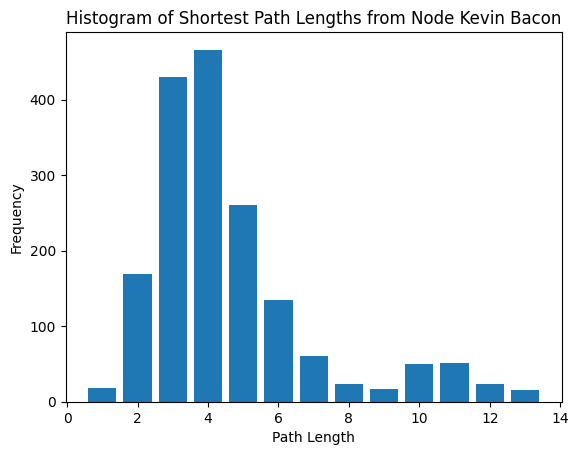

In [31]:
source_node = "Kevin Bacon"
path_length_histogram(G, source_node)

Note: frequency sums to 1721 (# of nodes in the largest connected component)

In [54]:
def visualize_path_lengths(graph, source_node):
    """
    Visualizes a graph with nodes colored based on their shortest path 
    length from a source node. The source node is larger, labeled, 
    and positioned centrally for better visibility.

    Args:
      graph: A NetworkX graph.
      source_node: The node from which to calculate path lengths.
    """

    shortest_paths = nx.shortest_path_length(graph, source=source_node)
    path_lengths = list(shortest_paths.values())

    # Calculate and print frequency of path lengths
    path_length_counts = Counter(path_lengths)
    print("Path Length Frequencies:")
    for length, count in sorted(path_length_counts.items()):
        print(f"Length: {length}, Frequency: {count}")

    # Use the updated way to get the colormap
    cmap = plt.colormaps['viridis']

    # Create a figure and an axes object with a larger figure size
    fig, ax = plt.subplots(figsize=(20, 16)) 

    # --- Improved node positioning ---
    pos = nx.spring_layout(graph, k=1.5, seed=42)  # Add seed for reproducibility

    # Get the initial position of the source node
    source_pos = pos[source_node]  

    # Calculate the average x and y coordinates of all nodes
    avg_x = sum(x for x, y in pos.values()) / len(pos)
    avg_y = sum(y for x, y in pos.values()) / len(pos)

    # Place the source node at the center
    pos[source_node] = (avg_x, avg_y) 

    # --- End of improved node positioning ---

    # Create a list of node sizes with the source node larger
    node_sizes = [1200 if length == 0 else 40 for length in path_lengths]

    # Draw nodes 
    nx.draw_networkx_nodes(graph, pos=pos, node_color=path_lengths, 
                           cmap=cmap, ax=ax, node_size=node_sizes)  

    # Draw edges with transparency
    nx.draw_networkx_edges(graph, pos=pos, ax=ax, width=0.4, alpha=0.15)

    # Create a dictionary for labels, with only the source node labeled
    labels = {node: node if length == 0 else "" for node, length in shortest_paths.items()}

    # Draw labels
    #nx.draw_networkx_labels(graph, pos=pos, labels=labels, ax=ax, font_size=10)

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max(path_lengths)))
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

    plt.title(f"Graph Colored by Path Length from Node {source_node}")
    plt.show()


Path Length Frequencies:
Length: 0, Frequency: 1
Length: 1, Frequency: 18
Length: 2, Frequency: 169
Length: 3, Frequency: 430
Length: 4, Frequency: 466
Length: 5, Frequency: 261
Length: 6, Frequency: 135
Length: 7, Frequency: 61
Length: 8, Frequency: 24
Length: 9, Frequency: 17
Length: 10, Frequency: 50
Length: 11, Frequency: 51
Length: 12, Frequency: 23
Length: 13, Frequency: 15


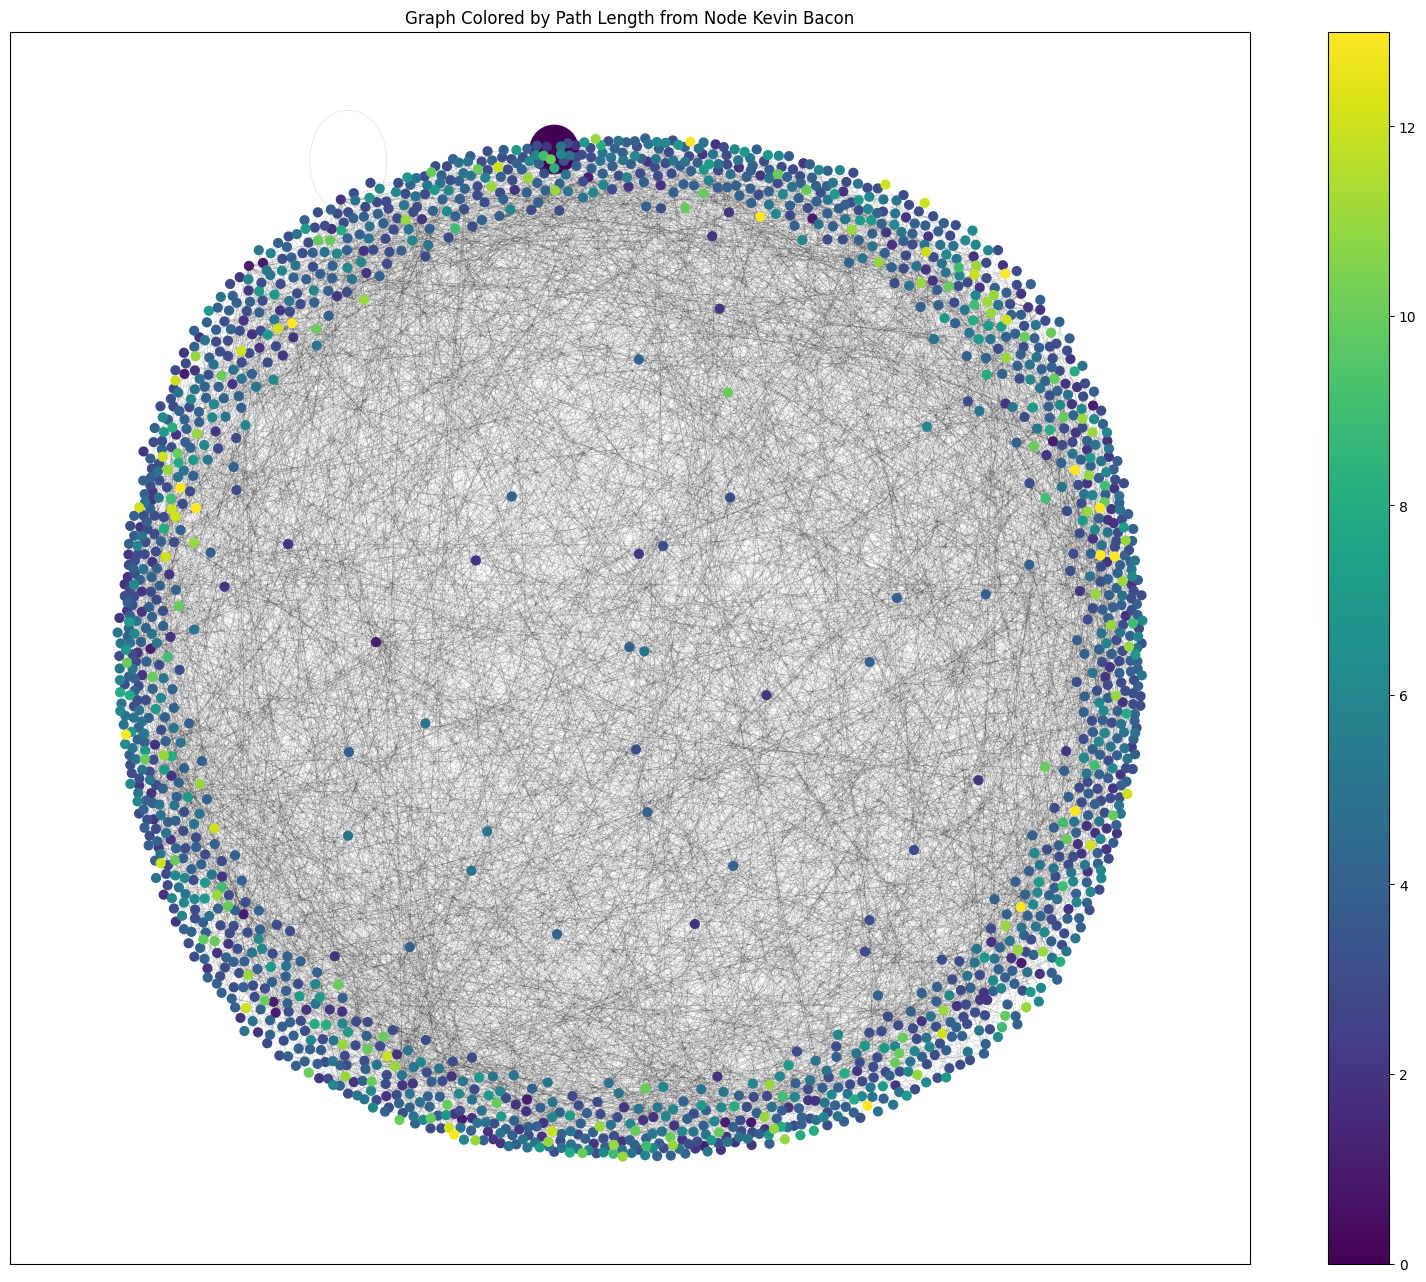

In [55]:
# Kevin Bacon
largest_cc = max(nx.connected_components(G), key=len)
# Create a subgraph of the largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)

visualize_path_lengths(largest_cc_subgraph,"Kevin Bacon")

Path Length Frequencies:
Length: 0, Frequency: 1
Length: 1, Frequency: 45
Length: 2, Frequency: 174
Length: 3, Frequency: 479
Length: 4, Frequency: 489
Length: 5, Frequency: 241
Length: 6, Frequency: 103
Length: 7, Frequency: 30
Length: 8, Frequency: 17
Length: 9, Frequency: 44
Length: 10, Frequency: 57
Length: 11, Frequency: 26
Length: 12, Frequency: 15


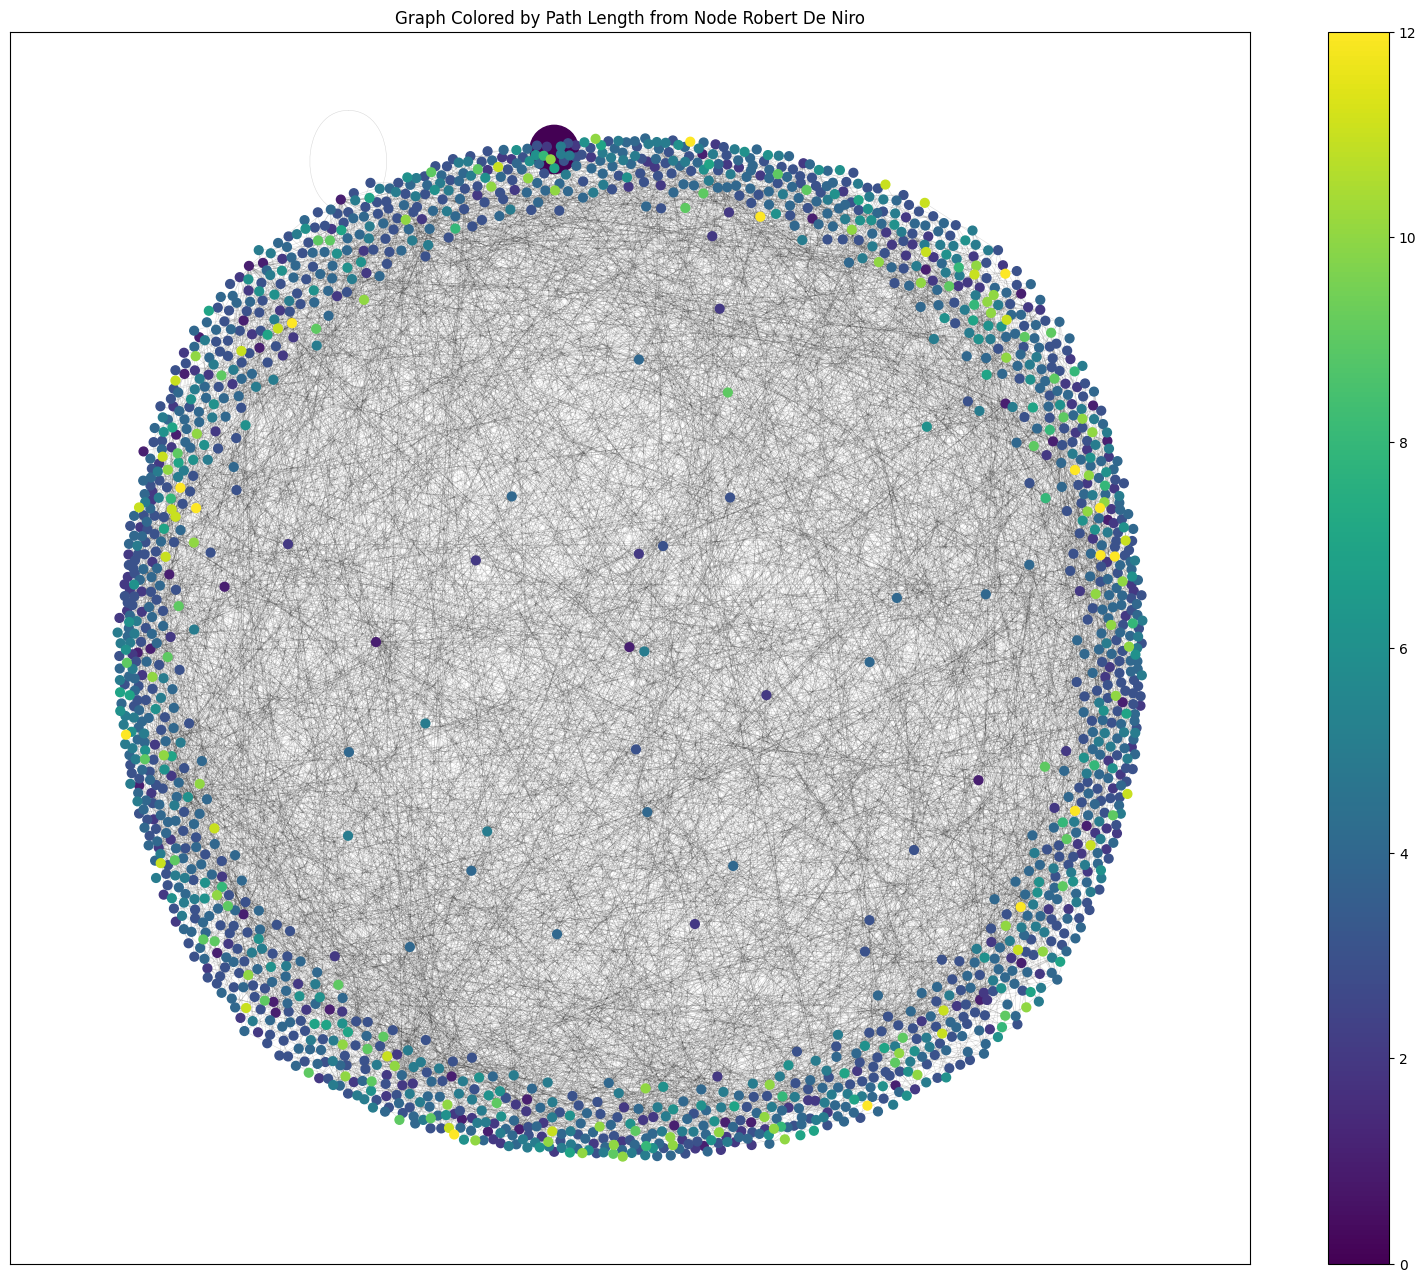

In [56]:
# Robert De Niro (Highest closeness centrality)
largest_cc = max(nx.connected_components(G), key=len)
# Create a subgraph of the largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)

visualize_path_lengths(largest_cc_subgraph,"Robert De Niro")

Path Length Frequencies:
Length: 0, Frequency: 1
Length: 1, Frequency: 6
Length: 2, Frequency: 18
Length: 3, Frequency: 85
Length: 4, Frequency: 329
Length: 5, Frequency: 566
Length: 6, Frequency: 437
Length: 7, Frequency: 177
Length: 8, Frequency: 60
Length: 9, Frequency: 24
Length: 10, Frequency: 3
Length: 11, Frequency: 3
Length: 12, Frequency: 9
Length: 13, Frequency: 3


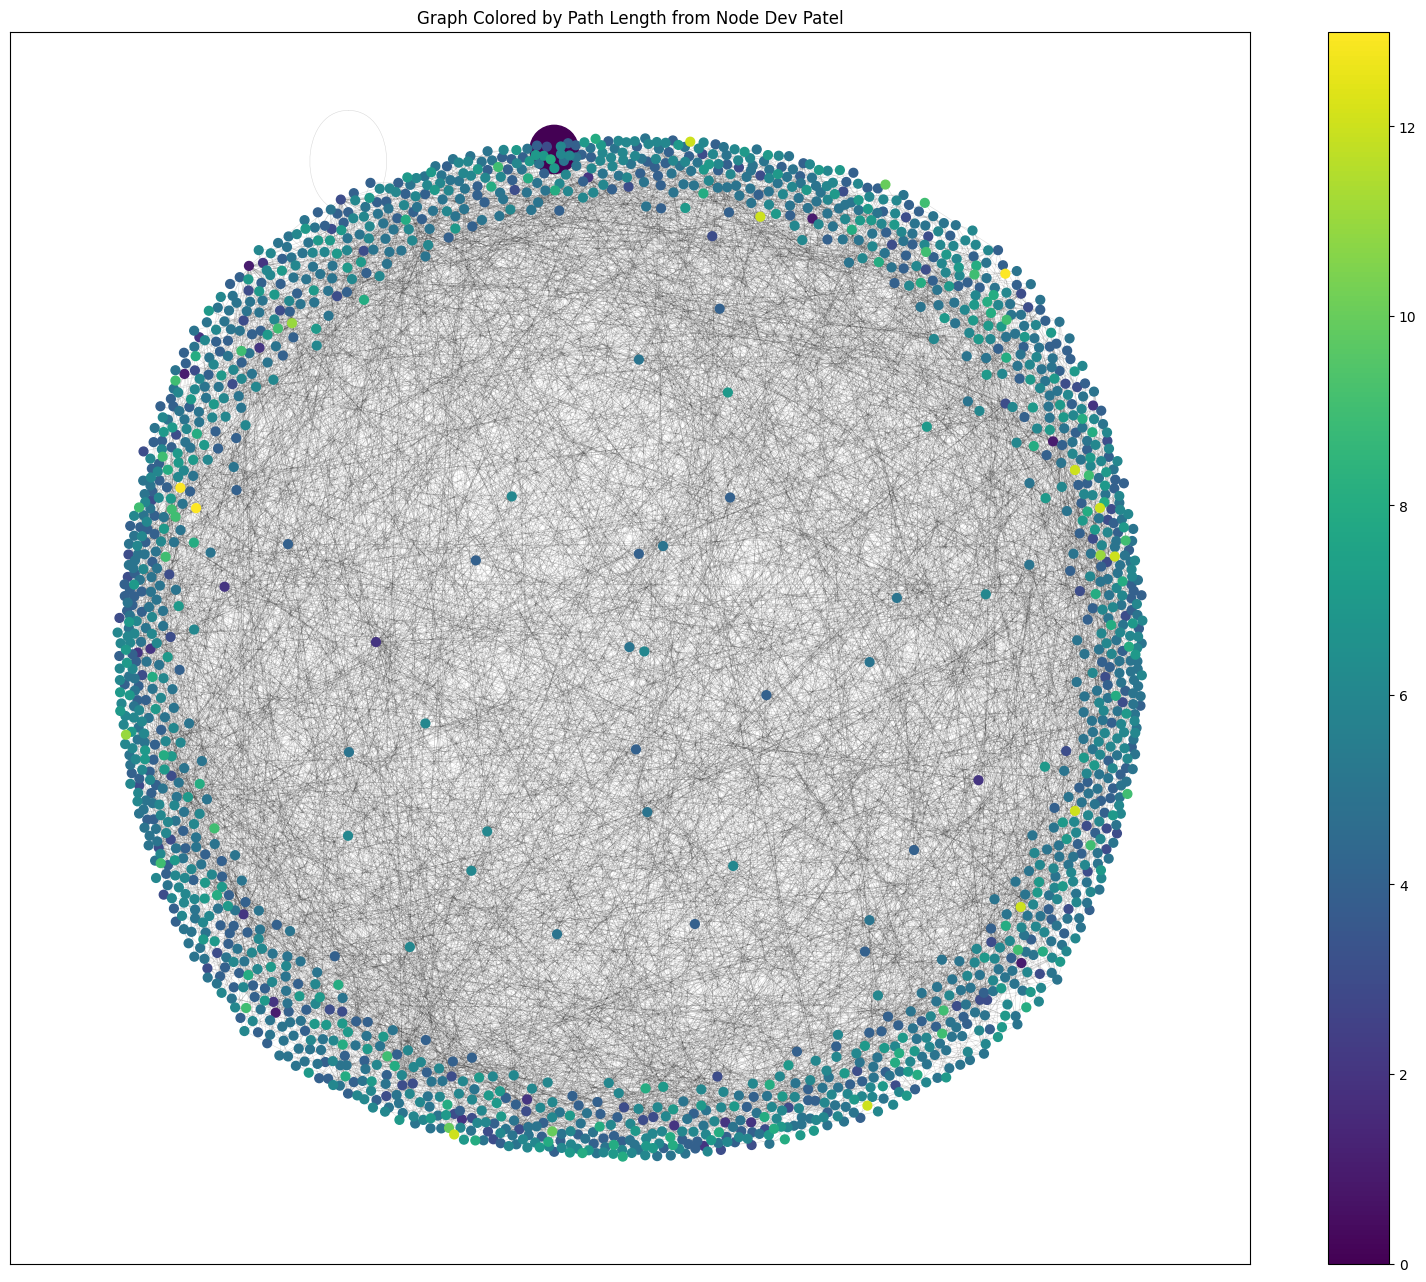

In [57]:
# Dev Patel (Highest betweness centrality)
largest_cc = max(nx.connected_components(G), key=len)
# Create a subgraph of the largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)

visualize_path_lengths(largest_cc_subgraph,"Dev Patel")

In [59]:
def has_duplicates(lst):
  return len(lst) != len(set(lst))

# Self Loops
self_loop_nodes = list(nx.nodes_with_selfloops(G))
print(self_loop_nodes)

for index, row in df.iterrows():
    rows = [row["Series_Title"],row["Star1"],row["Star2"],row["Star3"],row["Star4"]]
    if has_duplicates(rows):
        print(row["Series_Title"], "has duplicate stars!")

['Gene Kelly', 'Buster Keaton', 'Taika Waititi', 'Massimo Troisi']
Singin' in the Rain has duplicate stars!
The General has duplicate stars!
What We Do in the Shadows has duplicate stars!
Il postino has duplicate stars!
